In [1]:
import numpy as np
import pandas as pd
import random
import math
import statistics as stat
from matplotlib import pyplot as plt

#X : array 0,1 - point x,y | array 2 - distance to cluster | array 3 - cluster assign

#calculate ecludean distance (sqrt((x1-x2)^2 + (y1-y2)^2))
def ecludeanDistance(a,b):
#     distance = math.sqrt( pow(x1 - x2,2) + pow(y1-y2,2))
        
    return np.linalg.norm(a-b)



In [2]:
data = pd.read_csv('../Data/Happiness/2016.csv')

In [3]:
data.head()


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [4]:

x = data['Freedom'].values
y = data['Generosity'].values

xmin = min(x)
xmax = max(x)
ymin = min(y)
ymax = max(y)



In [5]:
# plt.scatter(x,y, c='black', s=10)
# plt.scatter(centro[:,0],centro[:,1], marker ="*", s=200, c='g')
# plt.show()
B = np.array(list(zip(x,y)))

In [6]:
def Kmeans(k, data):
    
    instance,attributes = data.shape
        
    c= k
    centroids = []
    
#     initialize centroids randomly
    for i in range (0,c):
        centroids.append([random.uniform(xmin,xmax),random.uniform(ymin,ymax)])
        
    centro = np.array(centroids)
    
#     initialize distance

    dist = np.zeros((instance,))
    assign_to = np.zeros((instance,), dtype=int)
    
    changes = True
    while changes:
        changes = False
        
    #     initialize distance for each data
        for index in range(0,instance):
            for cluster in range(0,c):
                calDistance = ecludeanDistance(data[index],centro[cluster])
                dist[index] = calDistance
                assign_to[index] = cluster
                    
    #     compare distance for each data
        for index in range(0,instance):
            for cluster in range(0,c):
                calDistance = ecludeanDistance(data[index],centro[cluster])
                if dist[index] > calDistance:
#                     print (cluster)
#                     changes = True
#                     print ("Distance : " + str(dist[index]))
                    dist[index] = calDistance
#                     print ("calDistance : " + str(calDistance))
#                     print ( "Change cluster -> " +str(assign_to[index]) + " to "+ str(cluster))
                    assign_to[index] = cluster
                    
            
            
#       temp for checking changes
        tempclust = np.zeros((c,2))
    
# centroid update 
        for cluster in range(0,c):            
            total_x = 0
            total_y = 0
            count = 0
            for i in range(0,instance):
                if(assign_to[i] == cluster):
                    total_x += data[i,0]
                    total_y += data[i,1]
                    count += 1
#             print(centro[cluster,0])
            tempclust[cluster,0] = total_x/count
            tempclust[cluster,1] = total_y/count
#             centro[cluster,1] = tempclust[cluster,1]
#             centro[cluster,0] = tempclust[cluster,0]
            if tempclust[cluster,0] != centro[cluster,0]:
                centro[cluster,0] = tempclust[cluster,0]
                changes = True
                
            if tempclust[cluster,1] != centro[cluster,1]:
                centro[cluster,1] = tempclust[cluster,1]
                changes = True
                
            
#             print(total_x/len(data))
#             print (centro[cluster,:])
        print(centro)
        print(assign_to)
    
    return (centro,assign_to)

In [7]:
centroids,labels = Kmeans(4,B)

[[0.24531964 0.10095679]
 [0.43827333 0.65729333]
 [0.1370305  0.2742275 ]
 [0.44643075 0.26236283]]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3
 0 3 3 3 3 3 0 0 0 3 3 3 0 3 3 3 3 0 0 3 0 3 0 0 3 3 3 3 3 3 0 3 3 3 3 3 0
 3 3 2 0 1 3 0 3 0 3 3 2 2 2 3 0 0 2 3 3 3 3 2 0 0 3 3 3 3 3 2 3 3 0 3 3 3
 0 3 3 3 3 3 3 1 0 0 3 2 3 2 0 3 3 0 2 0 3 2 0 3 2 3 2 3 3 2 3 2 2 3 3 0 2
 3 3 3 3 3 2 3 2 2]
[[0.27666214 0.12103714]
 [0.49946    0.535405  ]
 [0.13662238 0.25939619]
 [0.4605322  0.25777976]]
[3 3 1 3 3 3 1 1 1 3 3 3 3 3 3 3 3 3 3 3 0 3 1 3 3 3 3 3 3 1 3 3 1 3 3 3 3
 0 3 3 3 3 3 0 0 0 3 3 3 0 0 3 3 3 0 0 3 0 3 0 0 3 3 0 3 3 3 0 3 3 0 0 3 0
 3 3 2 0 1 0 0 3 0 1 3 2 2 2 3 0 0 2 2 3 0 3 1 0 0 3 3 3 0 0 2 3 3 0 0 3 3
 0 3 3 3 3 1 3 1 0 0 3 2 3 2 0 0 0 0 2 0 3 2 0 0 2 3 2 3 3 2 3 2 2 3 3 0 2
 3 2 3 3 3 2 0 2 2]
[[0.28666    0.132391  ]
 [0.50277    0.48472905]
 [0.12364789 0.26156632]
 [0.46276955 0.24365761]]
[3 3 1 3 3 1 1 1 1 1 3 3 1 3 3 3 3 3 1 3 0 3 1 3 3 0 0 3 

In [8]:
# print (labels)
# print (centroids)

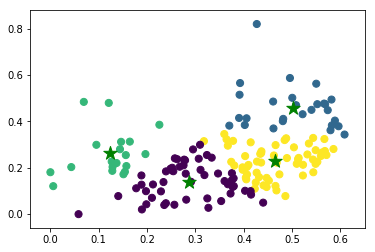

In [9]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']

c1 = centroids[:,0]
c2 = centroids[:,1]
plt.scatter(x,y, c=labels, s=50)
plt.scatter( c1, c2 , marker ="*", s=200, c='g')
plt.show()